Covid 19 Data Analysis
How Concerned Are Americans About the Coronavirus?
This is my first project based on data downloaded from https://data.fivethirtyeight.com/ or https://github.com/fivethirtyeight/covid-19-polls
on the night of 20 December 2020 - two days after it was uploaded on the web
While the above is the overall topic of this analysis, it is broken into 2 parts:
a) whether or not Americans approve the way Trump is handling covid 19; and
b) how concerned they feel about aspects of the outbreak such as infection and economic impact.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Questions (tasks) (will add more as I develop):
o What are the parties of the respondents?
o Does their party affiliation affect their response?
o Is there any trend?
o Analyse the approval and disapproval responses in total and in relation to different criteria eg party, pollster and sponsor
o Visualise as much as possible


In [2]:
#After downloarding the data, this is to read it into a data from which I call covdf
covidf=pd.read_csv('covid_approval_polls.csv')
#The file read here contains polls that ask Americans whether or not they approve of the way Trump is handling covid-19.

In [3]:
covidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 13 columns):
start_date     2137 non-null object
end_date       2137 non-null object
pollster       2137 non-null object
sponsor        1039 non-null object
sample_size    2124 non-null float64
population     2137 non-null object
party          2137 non-null object
subject        2137 non-null object
tracking       2130 non-null object
text           2136 non-null object
approve        2134 non-null float64
disapprove     2122 non-null float64
url            2137 non-null object
dtypes: float64(3), object(10)
memory usage: 217.1+ KB


In [4]:
#Reading the first 3 records
covidf.head(2)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...


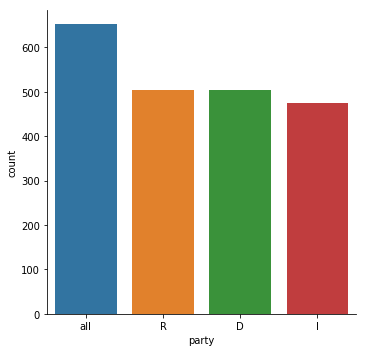

In [5]:
#Respondents as to party affiliation
sns.catplot(x='party',data=covidf, kind='count')

In [6]:
covidf.groupby('party').count()

,start_date,end_date,pollster,sponsor,sample_size,population,subject,tracking,text,approve,disapprove,url
party,,,,,,,,,,,,
D,505,505,505,240,501,505,505,503,505,504,499,505
I,475,475,475,233,470,475,475,475,475,474,472,475
R,505,505,505,240,501,505,505,503,505,504,499,505
all,652,652,652,326,652,652,652,649,651,652,652,652


C:\Users\abelu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


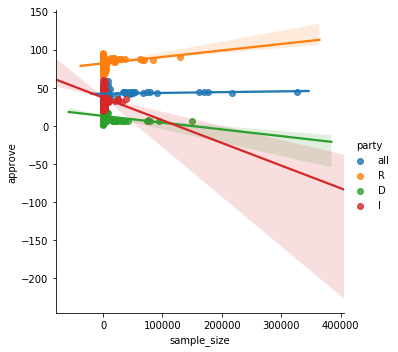

In [7]:
#Trying to determine the relationship between approval and sample size with regards to each party
sns.lmplot(x='sample_size',y='approve', data=covidf,hue='party')

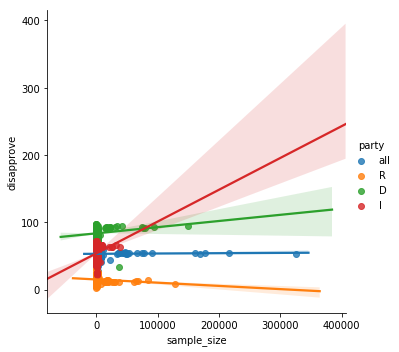

In [8]:
#Trying to determine the relationship between disapproval and sample size with regards to each party
sns.lmplot('sample_size','disapprove',covidf, hue='party')

In [9]:
#Aha, the subject attribute (column) marks whose handling of covid-19 the approval poll is about.  In this case it is Trump.  Therefore every row on this column carries the same value.

In [10]:
covidf.groupby('population').count()

,start_date,end_date,pollster,sponsor,sample_size,party,subject,tracking,text,approve,disapprove,url
population,,,,,,,,,,,,
a,1339,1339,1339,667,1338,1339,1339,1338,1339,1339,1324,1339
lv,96,96,96,40,93,96,96,96,95,96,96,96
rv,702,702,702,332,693,702,702,696,702,699,702,702


Population: 1 = adults; lv = likely voters; rv = registered voters

In [11]:
covidf.groupby('sponsor').count().head(2)

,start_date,end_date,pollster,sample_size,population,party,subject,tracking,text,approve,disapprove,url
sponsor,,,,,,,,,,,,
314 Action,1,1,1,1,1,1,1,1,1,1,1,1
ABC,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
covidf.groupby('pollster').count().head(2)

,start_date,end_date,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
pollster,,,,,,,,,,,,
ABC,21,21,4,21,21,21,21,21,21,21,21,21
AP-NORC,23,23,0,23,23,23,23,23,23,23,17,23


In [13]:
p=covidf.groupby('party').count()

In [14]:
p

,start_date,end_date,pollster,sponsor,sample_size,population,subject,tracking,text,approve,disapprove,url
party,,,,,,,,,,,,
D,505,505,505,240,501,505,505,503,505,504,499,505
I,475,475,475,233,470,475,475,475,475,474,472,475
R,505,505,505,240,501,505,505,503,505,504,499,505
all,652,652,652,326,652,652,652,649,651,652,652,652


In [15]:
p.start_date

party
D      505
I      475
R      505
all    652
Name: start_date, dtype: int64

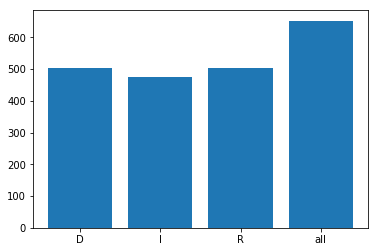

In [16]:
#Number who approved the handling of Covid 19 by Donald Trump
#as per party affiliation
party=['D','I','R','all']
plt.bar(party,p.approve)
plt.show()

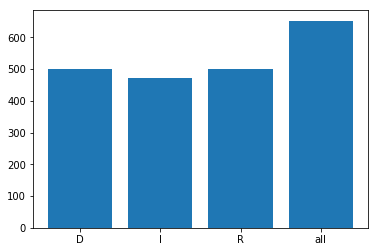

In [17]:
#Number who disapproved the handling of Covid 19 by Donald Trump
#as per party affiliation
party=['D','I','R','all']
plt.bar(party,p.disapprove)
plt.show()

25 Dec 2020 To be continued ...

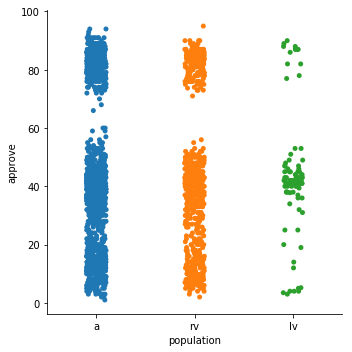

In [18]:
#In terms of population a is for adults, rv for registered voters, lv for likely voters
#This graph shows the approval rating as per the 3 population categories
sns.catplot(x='population',y='approve',data=covidf)

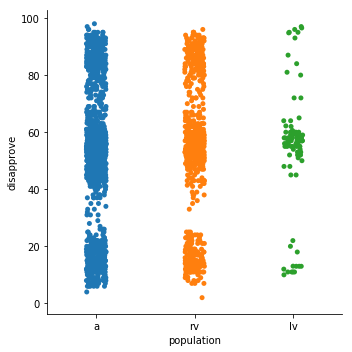

In [19]:
#population who disapproved.
sns.catplot(x='population',y='disapprove',data=covidf)

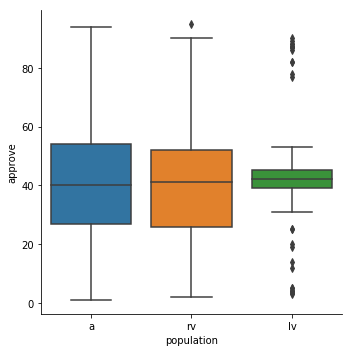

In [52]:
#This whiskers plot indicates the quartiles (the 2nd quartile being the mean), 
#the outliners, the minimum and the maximum values.  It also indicates how spread
#the responses are within each population.  The adults and registered voters have
#spreads that are very similar and comparatively wide whereas the likely voters have a very tight spread.
sns.catplot(x='population',y='approve',data=covidf,kind='box')

In [48]:
#This creates a neutral column by subtracting the sum of approve and disapprove from 100%
covidf['neutral']=100-(covidf.approve+covidf.disapprove)

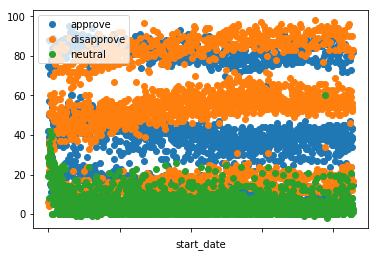

In [51]:
#This is a rough strend of approval vs disapproval ratings.  It shows that they are
#complimentary except in the middle values where there is some divergence.
#The neutral is shown in green
covidf.plot(x='start_date',y=['approve','disapprove','neutral'],marker='o',linestyle='')

In [41]:
#I here subtract disapproved score from the approved and took
#a percentage to visualise the comparative approval in the polls.
covidf['difference']=(covidf.approve-covidf.disapprove)

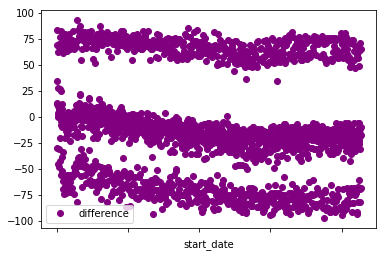

In [42]:
#Plotting the rating difference (approve-disapprove) below
#confirms the above result that approval and disapproval mostly
#complement each other
covidf.plot(x='start_date',y='difference',marker='o',linestyle='',color='purple')

In [50]:
covidf.head(2)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url,difference,neutral
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,13.0,29.0
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,69.0,19.0


In [43]:
covidf['start_date'].max()

'2020-12-15'

In [26]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in covidf['start_date']:
    if date[0:10] == '2020-12-15':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

2134
2136


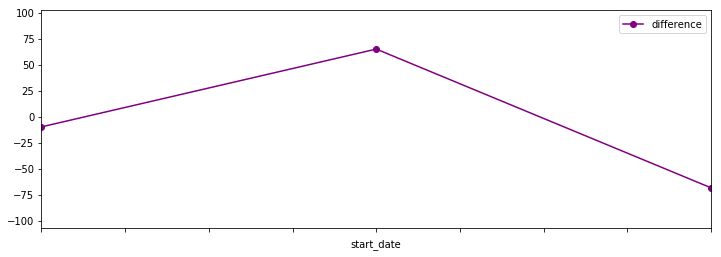

In [27]:
# This graph shows that the approval rating rose from a difference of little below 0 (about -8) to about 50 by the
#middle of the polling at which point, it dropped at a faster rate to about 70 at the end of the polling
fig = covidf.plot('start_date','difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(2134,2136))

In [28]:
covidf['start_date'].min()

'2020-02-02'

In [29]:
pop_approve= covidf.groupby('population').mean()['approve']
pop_approve

population
a     43.488611
lv    43.787604
rv    43.535479
Name: approve, dtype: float64

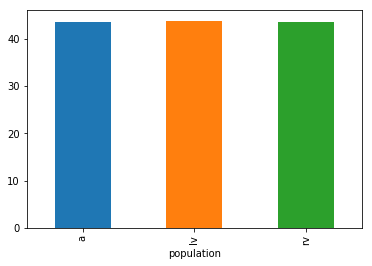

In [30]:
#below shows the average approval rate per population type is
#about the same
pop_approve.plot(kind='bar')

In [31]:
party_approve= covidf.groupby('party').mean()['approve']
party_approve

party
D      12.773690
I      36.703165
R      82.229980
all    42.311365
Name: approve, dtype: float64

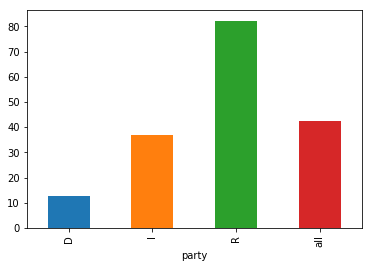

In [32]:
#below shows clear difference in the approval rating per party affiliation.
party_approve.plot(kind='bar')

This part of the project will answer the question of how concerned Americans are about aspects of the outbreak such as infection and economic impact.

In [33]:
#After downloarding the data, this is to read it into a data from which I call covdf
covidfc=pd.read_csv('covid_concern_polls.csv')

In [34]:
covidfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
start_date     618 non-null object
end_date       618 non-null object
pollster       618 non-null object
sponsor        238 non-null object
sample_size    618 non-null int64
population     618 non-null object
party          618 non-null object
subject        618 non-null object
tracking       618 non-null bool
text           618 non-null object
very           618 non-null float64
somewhat       618 non-null float64
not_very       618 non-null float64
not_at_all     615 non-null float64
url            618 non-null object
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 68.3+ KB


In [35]:
covidfc.head(2)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.0,33.0,23.0,11.0,https://morningconsult.com/wp-content/uploads/...
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.0,32.0,25.0,7.0,https://morningconsult.com/wp-content/uploads/...


In [36]:
covidfc.describe()

,sample_size,very,somewhat,not_very,not_at_all
count,618.000000,618.000000,618.000000,618.000000,615.000000
mean,2929.983819,37.890728,34.826990,17.299871,8.518992
std,8880.044539,13.935526,5.146127,7.900785,4.889708
min,502.000000,8.000000,19.000000,2.000000,1.000000
25%,1002.000000,27.650000,32.000000,11.000000,4.000000
50%,1022.000000,36.000000,35.000000,17.000000,8.000000
75%,1960.000000,47.000000,38.000000,23.000000,12.000000
max,91214.000000,73.000000,48.000000,43.000000,29.000000


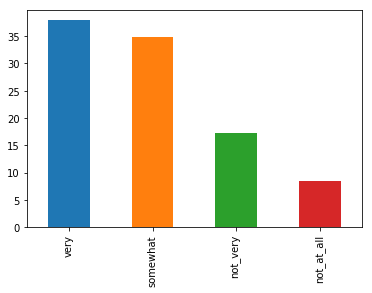

In [37]:
#This code shows the average feeling per each of the concern dimensions.
concern=covidfc[['very','somewhat','not_very','not_at_all']].mean()
#This code visualises in a bar chart
concern.plot(kind ='bar')

Great! Thanks for going through this.  My next project will be conneting to a database and sending queries to a database from pandas dataframe.  See you then.
29 December 2020